# Domanda 10

Discutere i risultati ottenuti per calcolare lo zero della funzione $f(x) = x − x^{1/3} − 2$ nell’intervallo $[3, 5]$ utilizzando:

- il metodo delle approssimazioni successive con $g(x) = x^{1/3} + 2$

- il metodo di Newton

mostrando l’ errore commesso al variare delle iterazioni $(x^∗ ≈ 3.5213)$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i=0
  err=np.zeros(maxit+1, dtype=np.float64)
  err[0]=tolx+1
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  vecErrore[0] = np.abs(f(xTrue)-f(x0))
  x=x0

  while (i<maxit and ((np.abs(f(x))>tolf) or err[i]>tolx)): # scarto assoluto tra iterati
    x_new= g(x)
    err[i+1]= np.abs(x_new-x)
    vecErrore[i+1]=np.abs(f(xTrue)- f(x_new)) 
    i=i+1
    x=x_new
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore) 


def newton(f, df, tolf, tolx, maxit, xTrue, x0=0):
    g = lambda x: x-f(x)/df(x)
    (x, i, err, vecErrore) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    return (x, i, err, vecErrore)

fTrue =  -6.822785407889498e-05 

Metodo approssimazioni successive g1 
 x = 3.521379706798214 
 iter_new= 13 

Metodo Newton 
 x = 3.521379706804568 
 iter_new= 4 



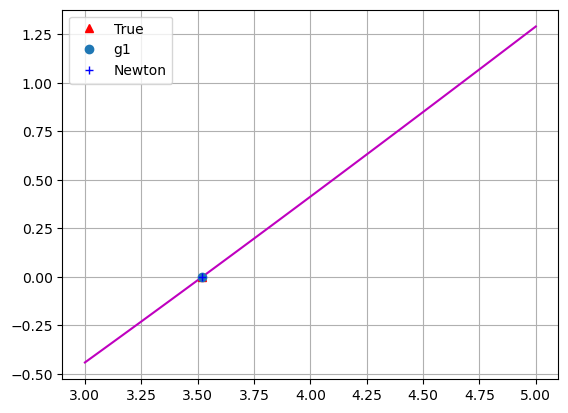

In [16]:
f = lambda x: x-x**(1/3)-2
df = lambda x: 1 - 1/3*x**(-2/3)
g1 = lambda x: x**(1/3)+2

xTrue = 3.5213
fTrue = f(xTrue)
print('fTrue = ', fTrue, '\n')

xplot = np.linspace(3, 5)
fplot = f(xplot)

plt.plot(xplot,fplot, '-m')
plt.plot(xTrue,fTrue, '^r', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0 = 3

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1, '\n')

plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton, '\n')

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()


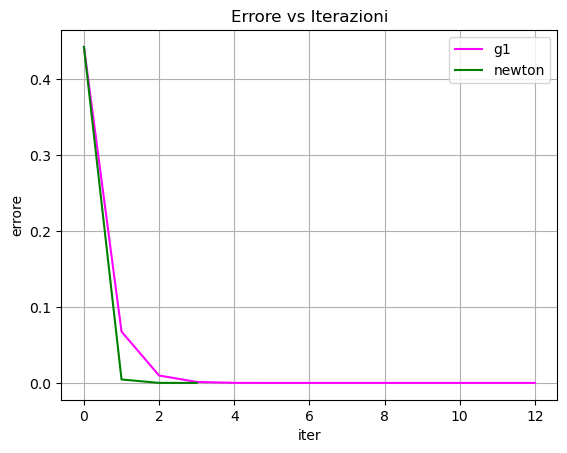

In [17]:
plt.plot(vecErrore_g1, '-', color='magenta')


plt.plot(vecErrore_newton, '-', color='green')


plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()